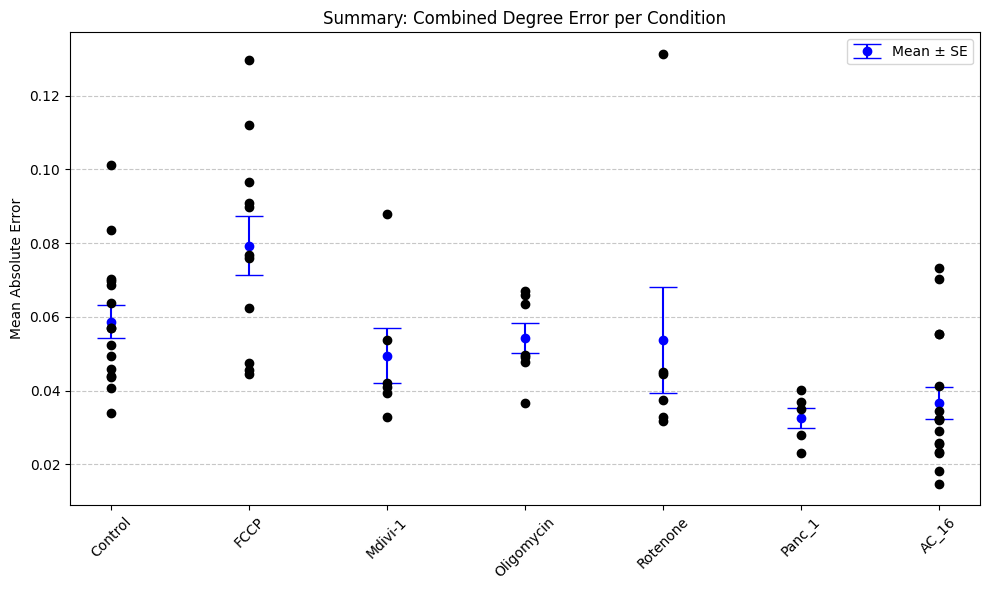

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths and labels
summary_files = {
    "Control": "/home/mattliao/agent_based_model/readdy/02_control_single_cell_error_summary.csv",
    "FCCP": "/home/mattliao/agent_based_model/readdy/02_FCCP_single_cell_error_summary.csv",
    "Mdivi-1": "/home/mattliao/agent_based_model/readdy/02_mdivi1_single_cell_error_summary.csv",
    "Oligomycin": "/home/mattliao/agent_based_model/readdy/02_oligomycin_single_cell_error_summary.csv",
    "Rotenone": "/home/mattliao/agent_based_model/readdy/02_rotenone_single_cell_error_summary.csv",
    "Panc_1": "/home/mattliao/agent_based_model/readdy/02_panc_1_single_cell_error_summary.csv",
    "AC_16": "/home/mattliao/agent_based_model/readdy/02_confocal_HR_single_cell_error_summary.csv"
}

# Plot setup
plt.figure(figsize=(10, 6))

# X positions
x_vals = np.arange(len(summary_files))
means = []
errors = []

# Plot each group
for idx, (label, path) in enumerate(summary_files.items()):
    try:
        df = pd.read_csv(path)
        values = df["Mean_Absolute_Error"].values
        mean = np.mean(values)
        se = np.std(values) / np.sqrt(len(values))

        means.append(mean)
        errors.append(se)

        # Scatter points
        plt.scatter([idx] * len(values), values, color='black', zorder=3)
    except Exception as e:
        print(f"Error loading {path}: {e}")
        means.append(np.nan)
        errors.append(0)

# Error bars (overall mean ± SE)
plt.errorbar(x_vals, means, yerr=errors, fmt='o', color='blue', capsize=10, label="Mean ± SE", zorder=2)

# Plot decorations
plt.xticks(x_vals, list(summary_files.keys()), rotation=45)
plt.ylabel("Mean Absolute Error")
plt.title("Summary: Combined Degree Error per Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
